### MODUL V: PERBAIKAN KUALITAS CITRA

#### 1. Lakukan perbaikan citra pada gambar sunf_2.jpg dengan menggunakan window/kernel 3x3, 5x5 dan 7x7 dengan menerapkan proses filtering:
#### - mean
#### - median
#### - modus

#### Import Library
Baris code di bawah ini digunakan untuk menginpor fungsi-fungsi yang akan digunakan dengan perincian
- matplotlib.pyplot digunakan untuk membuat grafik sederhana 2d.
- numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array.
- cv2 atau OpenCV berfungsi untuk melakukan konversi color space.
- math digunakan untuk melakukan operasi-operasi matematika.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### Deklarasi dan Inisialisasi Citra
Fungsi imread digunakan untuk membaca suatu data citra dari file yang mana dalam code ini, kedua file citra yang akan digunakan masing-masing disimpan ke dalam variabel img

In [2]:
img = plt.imread("sunf_2.jpg")

#### Mengubah Citra ke dalam Grayscale
Perintah di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale.Fungsi cvtColor digunakan untuk mengubah gambar ke dalam warna yang diinginkan. 
- Pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
- Kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan dalam hal ini digunakan cv.COLOR_BGR2GRAY
- Ketiga, hasil color space conversion disimpan ke dalam variable grayimg

In [3]:
grayimg = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#### Menampilkan Hasil Citra Asli dengan Citra Grayscale
Baris perintah di bawah ini digunakan untuk menampilkan hasil pengolahan citra. Hasil keluaran dari fungsi ini ialah perbandingan antara citra sebelum dan sesudah diolah menjadi grayscale. Untuk menampilkan dua citra sekaligus digunakan fungsi subplots dengan f,ax merujuk pada jumlah baris dan kolom yang diiginkan. 
Dalam baris perintah ini digunakan library matplotlib, maka harus digunakan colormap (cmap).Apabila tidak menggunakan cmap, maka secara default akan dihasilkan citra dengan warna yang berbeda dari yang telah diolah sebelumnya.
Berikutnya digunakan fungsi set_title untuk memberikan judul dari tiap citra pada tiap indeksnya

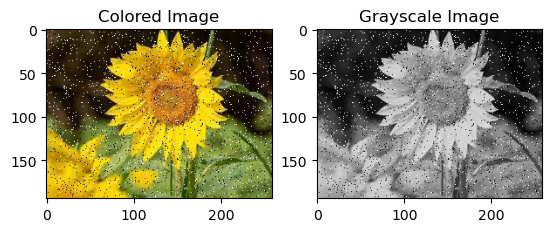

In [4]:
f, ax = plt.subplots(1,2)
ax[0].imshow(img) 
ax[0].set_title("Colored Image")
    
ax[1].imshow(grayimg, cmap = 'gray') 
ax[1].set_title("Grayscale Image")
plt.show()

#### Menampilkan Hasil Filtering
Fungsi display digunakan untuk menampilkan hasil pengolahan ke dalam bentuk subplot. Pada fungsi ini digunakan sebanyak 3 parameter untuk citra yang akan ditampilkan, yaitu citra untuk hasil filtering modus, mean, dan median serta sisa satu parameter lainnya, yaitu text yang akan ditampilkan dari title pada tiap citra. Pada fungsi di bawah ini digunakan fungsi plt.subplot yang digunakan dan berisi dari gambar dan sumbu yang akan digunakan. 

In [5]:
def display(img1,img2,img3,text):
    f, ax = plt.subplots(1,3)
    ax[0].imshow(img1, cmap = 'gray') 
    ax[0].set_title(text + " 3 x 3")
    
    ax[1].imshow(img2, cmap = 'gray') 
    ax[1].set_title(text + " 5 x 5")
    
    ax[2].imshow(img3, cmap = 'gray') 
    ax[2].set_title(text + " 7 x 7")
    
    plt.tight_layout()
    plt.show()

#### Proses Filtering
Fungsi filtering digunakan untuk melakukan salah satu proses filtering antara mean,median, dan modus. Pada fungsi ini digunakan 4 buah parameterm yaitu img yang merupakan citra yang akan diolah, w_kernel dan h_kernel merupakan panjang dan lebar dari besaran filtering yang diinginkan, serta op yang bernilai string dan digunakan untuk menunjukkan operasi filtering mana yang akan dilakukan. Pada fungsi ini akan dilakukan padding agar semua pixel dalam matrix ikut terkena filter. Berikutnya, akan dilakukan pengkondisian untuk menentukan operasi filtering mana yang akan dilakukan.

In [6]:
def filtering(img,w_ker,h_ker,op):
    h_img, w_img = img.shape
    size = w_ker*h_ker
    
    #mencari nilai tengah dari kernel
    #operand // digunakan agar hasil pembagian bernilai integer
    h_center = ((h_ker-1)//2)
    w_center = ((w_ker - 1)//2)
    
    #mendapatkan ukuran padding 
    l_pad = w_center
    #left padding
    r_pad = w_ker - w_center
    #right padding
    t_pad = h_center
    #top padding
    b_pad = h_ker - h_center
    #bottom padding
    arr = np.pad(img,((l_pad,r_pad),(t_pad,b_pad)), mode = 'constant')
    #parameter pertama menunjukkan array yang akan dilakukan padding
    #parameter kedua, yaitu padd width menunjukkan pada bagian mana saja akan dilakukan 
    #parameter ketiga, yaitu mode padding yang digunakan yang mana pada baris perintah ini digunakan mode constant yang mana
    #pada mode ini pada sis kernel diberikan 
    #mode edge berarti akan dilakukan padding menggunakan nilai tepi pada array
    
    result = np.zeros((h_img,w_img))
    #result digunakan untuk menampung hasil perhitungan dengab menggunakan filter
    #dibuat array dengan isian kosong dengan ukuran sebesar citra diolah
    
    temp = np.zeros((h_ker,w_ker)).astype(int)
    #temp digunakan untuk menyimpan array yang yang akan diproses pada masing-masing fungsi.
     
    #perulangan di bawah  ini dilakukan untuk melakukan proses padding
    #perulangan i dan j menyesuaikan dengan besaran citra yang akan diproses
    for i in range(h_img):
        for j in range (w_img):
            #perulangan k dan l menyesuaikan dengan besaran kernel
            for k in range (h_ker):
                for l in range (w_ker):
                    temp[k,l]= arr[i+k,j+l]                
            if (op == "mean"):
                res = mean_filtering(temp)
            elif (op == "median"):
                res = median_filtering(temp)
            else:
                res = modus_filtering(temp)
            result[i,j] = res
    return result

#### Mean Filtering
Fungsi mean_filtering digunakan untuk melakukan proses perhitungan pencarian nilai rata-rata. Pada fungsi ini digunakan parameter arr yang menunjukkan array dalam bentuk 2d yang akan dicari nilai rata-ratanya. Besaran array ini bergantung dari besaran kernel yang diminta. Berikut adalah alur eksekusi untuk menemukan nilai rata-rata pada fungsi di bawah ini:
- Deklarasi dan inisialisasi sebuah variabel untuk menyimpan hasil perhitungan nilai rata-rata yang dalam fungsi di bawah ini diberi nama mean.
- Setiap nilai pixel di dalam array akan dijumlahkan dengan cara melakukan perulangan menggunakan nested for looping. Hasil penjumlagan tiap pixel akan disimpan pada variabel mean.
- Hasil penjumlahan tiap pixel pada variabel mean dibagi dengan banyaknya data yang ada (tinggi* lebar).
- Mengembalikan hasil perhitungan rata-rata kepada fungsi pemanggil.

In [7]:
def mean_filtering(arr):
    mean = 0
    for i in range (arr.shape[0]):
        for j in range (arr.shape[1]):
            mean+=arr[i][j]
    mean /= arr.shape[0]*arr.shape[1]
    return mean

#### Median Filtering
Fungsi median filtering digunakan untuk melakukan proses filtering dengan mencari nilai tengah dari sebuah array. Pada fungsi ini digunakan parameter arr yang menunjukkan array dalam bentuk 2d yang akan dicari nilai rata-ratanya. Besaran array ini bergantung dari besaran kernel yang diminta. Berikut adalah alur eksekusi untuk menemukan nilai rata-rata pada fungsi di bawah ini:
- Mengubah array 2d ke dalam bentuk 1d dengan menggunakan fungsi flatten() yang disimpan pada variabel temp.
- Melakukan sorting pada nilai pada array dalam variabel temp dengan menggunakan fungsi sort(). Proses pengurutan dilakukan secara ascending atau dari nilai terkecil hingga terbesar.
- Berikutnya mencari titik tengah dari panjang array yang disimpan pada variabel mid dengan cara panjang dari array dibagi 2. Pada proses pencarian titik tengah ini digunakan operator "//" yang berfungsi agar hasil berupa bilangan integer.
- Membuat pengkondisian, apabila panjang array genap maka nilai median merupakan hasil penjumlahan nilai pada indeks mid ditambah dengan nilai pada indeks mid-1 lalu dibagi 2. Sedangkan, apabila panjang array ganjil maka nilai median merupakan nilai yang berada pada indeks ke mid.
- Mengembalikan hasil pencarian nilai media pada fungsi pemanggil.

In [8]:
def median_filtering(arr):
    #2d matix to 1d matrix
    temp = arr.flatten()
    #sorting ascending order
    temp.sort()
    #find median position
    mid = len(temp)//2
    #condition
    if(len(temp)%2 == 0):
        median = (temp[mid-1] + temp[mid]/2)
    else:
        median = temp[mid]
    #return result
    return median

#### Modus Filtering
Fungsi modus filtering digunakan untuk melakukan proses filtering dengan mencari nilai pada sebuah array dengan frekuensi kemuncula terbanyak. Pada fungsi ini digunakan parameter arr yang menunjukkan array dalam bentuk 2d yang akan dicari nilai rata-ratanya. Besaran array ini bergantung dari besaran kernel yang diminta. Berikut adalah alur eksekusi untuk menemukan nilai rata-rata pada fungsi di bawah ini:

1. Menghitung Kemunculan Tiap Nilai Pixel dalam Array
Setiap nilai pixel pada indeks ke [i,j] dimasukkan ke dalam variabel occurance dan apabila ditemui nilai pixel yang sama lagi maka akan ditambahkan satu
- ex: pada array arr[0][0] == 0 maka indeks variabel occurance akan menjadi occurance[0] = 1

2. Mencari Array dengan Nilai Terbanyak
Untuk mencari pixel dengan intensitas terbanyak digunakan perulangan menggunakan nested for loop sebanyak panjang dari array occurance. Sebelumnya, disiapkan 2 variabel kosong, yaitu max_occ dan modus dengan nilai masing-masing 0. Setiap kali dilakukan perulangan akan dilakukan perbandingan nilai pada variabel occurance dengan index ke i dengan nilai pada variabel max_occ. Apabila, nilai pada variabel occurance lebih besar maka variabel modus akan berisikan nilai dari indeks i (menunjukkan pixel) dan variabel max_occ berisi nilai dari variacel occurance pada variabel i (menunjukkan kemunculan dari pixel i). Proses ini akan terus berlanjut sampai pada indeks terakhir.

In [9]:
def modus_filtering(arr):
    #mencari banyaknya kemunculan tiap pixel
    occurance = np.zeros(256)
    for i in range (arr.shape[0]):
        for j in range (arr.shape[1]):
            occurance[arr[i,j]] += 1
            
    max_occ = 0
    modus = 0
    
    #mencari pixel dengan frekuensi kemunculan tert4ringgi
    for i in range (len(occurance)):
        if(occurance[i]>max_occ):
            modus = i
            max_occ = occurance[i]
            
    return modus

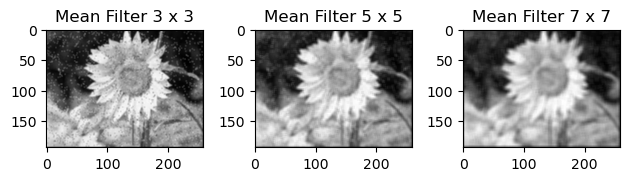

In [10]:
#menampilkan hasil filtering dengan parametr memanggil fungsi filtering, sehingga paramter pada fungsi display 
#merupakan hasil mean filtering
display(filtering(grayimg,3,3,"mean"),filtering(grayimg,5,5,"mean"),filtering(grayimg,7,7,"mean"),"Mean Filter")

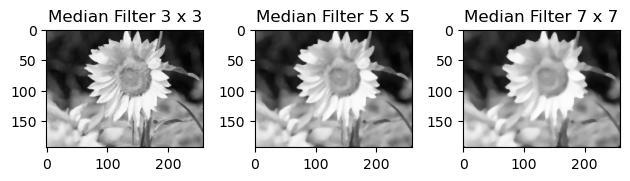

In [11]:
#menampilkan hasil filtering dengan parametr memanggil fungsi filtering, sehingga paramter pada fungsi display 
#merupakan hasil median filtering
display(filtering(grayimg,3,3,"median"),filtering(grayimg,5,5,"median"),filtering(grayimg,7,7,"median"),"Median Filter")

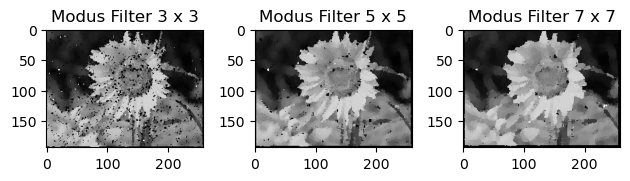

In [12]:
#menampilkan hasil filtering dengan parametr memanggil fungsi filtering, sehingga paramter pada fungsi display 
#merupakan hasil modus filtering
display(filtering(grayimg,3,3,"modus"),filtering(grayimg,5,5,"modus"),filtering(grayimg,7,7,"modus"),"Modus Filter")

Baris perintah di bawah ini digunakan untuk menampikan keseluruhan hasil filtering citra secara keseluruhan. Pada baris perintah ini digunakan fungsi plt.subplots(3,3) yang menunjukkan bahwa akan dibuat 3 baris dan 3 kolom. Berikutnya akan ditampilkan citra seperti pada contoh code
- ax[0,0].imshow menunjukkan bahwa akan ditampikan citra pada baris dengan indeks ke-0 dan kolom dengan indeks ke-0 dengan bentuk grayscale yang ditunjukkan dengan baris peritnah cmap = gray.
- ax[0,0].set_title digunakan untuk menampilkan judul dari tiap citra pada tiap indeksnya yang mana pada baris perintah ini berarti akan ditampilkan judul pada citra di baris dengan indeks ke-0 dan kolom dengan indeks ke-0.

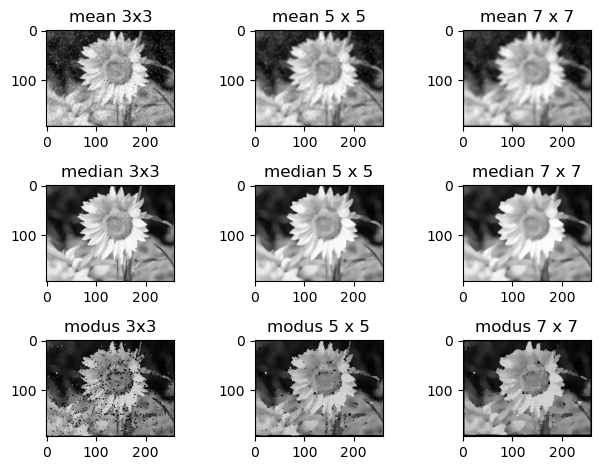

In [13]:
#menampilkan keseluruhan hasil filtering
f, ax = plt.subplots(3,3)

#mean
ax[0,0].imshow(filtering(grayimg,3,3,"mean"),cmap = 'gray') 
ax[0,0].set_title("mean 3x3")
ax[0,1].imshow(filtering(grayimg,5,5,"mean"), cmap = 'gray') 
ax[0,1].set_title("mean 5 x 5")
ax[0,2].imshow(filtering(grayimg,7,7,"mean"), cmap = 'gray') 
ax[0,2].set_title("mean 7 x 7")

#median
ax[1,0].imshow(filtering(grayimg,3,3,"median"),cmap = 'gray') 
ax[1,0].set_title("median 3x3")
ax[1,1].imshow(filtering(grayimg,5,5,"median"), cmap = 'gray') 
ax[1,1].set_title("median 5 x 5")
ax[1,2].imshow(filtering(grayimg,7,7,"median"), cmap = 'gray') 
ax[1,2].set_title("median 7 x 7")

#modus
ax[2,0].imshow(filtering(grayimg,3,3,"modus"),cmap = 'gray') 
ax[2,0].set_title("modus 3x3")
ax[2,1].imshow(filtering(grayimg,5,5,"modus"), cmap = 'gray') 
ax[2,1].set_title("modus 5 x 5")
ax[2,2].imshow(filtering(grayimg,7,7,"modus"), cmap = 'gray') 
ax[2,2].set_title("modus 7 x 7")

plt.tight_layout()
plt.show()